In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

# 12장 파이썬 모델링 라이브러리
* 모델 fitting
* 모델 scoring
* 데이터 cleaning
* 모델링 도구
  * statsmodels
    * https://www.statsmodels.org/stable/index.html
  * scikit-learn(사이킷런)
    * https://scikit-learn.org/stable

## 12.1 판다스와 모델 코드의 인터페이스
* 모델 개발 과정

1. 데이터 로딩: 판다스를 사용하여 데이터를 로드하고 데이터프레임으로 변환

2. 데이터 전처리: 판다스를 사용하여 데이터를 전처리
  * 피처 엔지니어링(feature engineering)
    
3. 모델 훈련: 판다스 데이터프레임을 모델 훈련에 사용

4. 모델 평가: 판다스를 사용하여 모델 성능을 평가

5. 모델 예측: 판다스 데이터프레임을 사용하여 모델 예측


### feature engineering
* 기계 학습 모델의 성능을 향상시키기 위해 데이터의 원시 특징을 변환하는 프로세스
* 데이터를 더욱 정보량이 풍부하고 예측하기 쉽게 만드는 데 도움이 도움이 됨.
* 피처 엔지니어링 기술
  * 결측값 처리: 결측값은 모델 성능에 부정적인 영향을 줌.
    * 결측값을 평균, 중앙값 또는 최빈값으로 대체
    * 결측값을 포함하는 행을 삭제
    * 결측값을 예측하는 모델을 훈련

  * 이상치 처리: 이상치는 모델 성능에 부정적인 영향을 줌
    * 이상치를 처리하는 방법
      * 이상치를 제거
      * 이상치를 변환
      * 이상치를 예측하는 모델을 훈련

  * 피처 스케일링: 피처 스케일링은 모든 피처가 동일한 범위에 있도록 보장하는 프로세스
    * 모델이 모든 피처에 동일한 가중치를 부여하는 데 도움
    * 피처 스케일링 기술
      * 표준화: 피처의 평균을 0으로, 표준 편차를 1로 조정
      * 정규화: 피처의 값이 0과 1 사이에 있도록 조정

  * 피처 변환: 피처 변환은 피처의 분포를 변경하는 프로세스
    * 이는 모델이 피처 간의 관계를 더 잘 학습하는 데 도움
    * 피처 변환 기술에
      * 로그 변환: 피처의 값을 로그로 변환
      * 제곱근 변환: 피처의 값을 제곱근으로 변환
      
  * 피처 선택: 피처 선택은 모델에 사용할 피처를 선택하는 프로세스
    * 이는 모델의 성능을 향상시키고 과적합을 줄이는 데 도움이 됨
    * 피처 선택 기술
      * 상관 관계 분석: 상관 관계가 높은 피처를 제거
      * 통계적 유의성 검정: 통계적으로 유의미하지 않은 피처를 제거
      * 머신 러닝 알고리즘: 피처 중요도를 평가하는 머신 러닝 알고리즘을 사용하여 피처를 선택

  *  피처 생성: 피처 생성은 새로운 피처를 만드는 프로세스
    * 이는 모델이 데이터의 패턴을 더 잘 학습하는 데 도움. * 피처 생성 기술
      * 교차 피처: 기존 피처를 결합하여 새로운 피처를 생성
      * 주성분 분석: 기존 피처의 주성분을 추출하여 새로운 피처를 생성
  

## 교차 검증(Cross-validation)
* 교차 검증은 머신러닝 모델의 성능을 평가하는 방법 중 하나
* 교차 검증은 데이터셋을 여러 개의 폴드(fold)로 나누고, 각 폴드를 한 번씩 평가 데이터로 사용하는 방법
* 예를 들어, 데이터셋을 5개의 폴드로 나누고 교차 검증을 사용하여 모델의 성능을 평가하면 다음과 같다.
  * 데이터셋을 5개의 폴드로 나눈다
  * 첫 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킨다.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다.
  * 예측과 실제 값을 비교하여 모델의 성능을 평가함
  * 두 번째 폴드를 평가 데이터로 사용하고, 나머지 4개의 폴드를 학습 데이터로 사용하여 모델을 훈련시킴.
  * 훈련된 모델을 사용하여 평가 데이터에 대한 예측을 만든다. 예측과 실제 값을 비교하여 모델의 성능을 평가한다.
  * 이 과정을 모든 폴드에 대해 반복한다.

* 교차 검증은 다음과 같은 장점이 있다.
  1) 모델의 성능을 정확하게 평가할 수 있다.
  2) 과적합을 방지할 수 있다.
  3) 하이퍼파라미터 튜닝에 사용할 수 있다.

* 교차 검증은 다음과 같은 단점이 있다.
  * 시간이 오래 걸린다.
  * 계산 자원이 많이 필요



* DataFrame -> Numpy Array 변환
  * df.to_numpy()

In [2]:
# ex
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})
print(data)
print()
print(data.to_numpy())
print(type(data.to_numpy())) #numpy 객체는 한 가지 데이터타입(모두 숫자형)으로 구성

   x0    x1    y
0   1  0.01 -1.5
1   2 -0.01  0.0
2   3  0.25  3.6
3   4 -4.10  1.3
4   5  0.00 -2.0

[[ 1.    0.01 -1.5 ]
 [ 2.   -0.01  0.  ]
 [ 3.    0.25  3.6 ]
 [ 4.   -4.1   1.3 ]
 [ 5.    0.   -2.  ]]
<class 'numpy.ndarray'>


* Numpy array -> DataFrame

In [3]:
# ex
df2 = pd.DataFrame(data.to_numpy(), columns=['one', 'two', 'three'])
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


* 전체 넘파이 ndarray에서 일부 배열만 선택

In [4]:
# ex
df3 = data.copy()
print(df3.to_numpy()) # 파이썬 객체  ndarray

df_X = df3.to_numpy()[:, :2]
print(df_X)
print(type(df_X))

[[ 1.    0.01 -1.5 ]
 [ 2.   -0.01  0.  ]
 [ 3.    0.25  3.6 ]
 [ 4.   -4.1   1.3 ]
 [ 5.    0.   -2.  ]]
[[ 1.    0.01]
 [ 2.   -0.01]
 [ 3.    0.25]
 [ 4.   -4.1 ]
 [ 5.    0.  ]]
<class 'numpy.ndarray'>


In [5]:
df_y = df3.to_numpy()[:, -1]
print(df_y)
print(type(df_y))

[-1.5  0.   3.6  1.3 -2. ]
<class 'numpy.ndarray'>


# 7.5 범주형 데이터(p.325)

* 모델링을 위한 더미 변수 생성하기
  * 통계나 머신러닝 도구를 사용하다 보면 범주형 데이터를 원-핫 인코딩(one-hot encoding)이라고 부르는 더미 변수(가변수, dummy variable)로 변환
  * 범주를 열로 갖는 DataFrame을 생성하는데, 각 열에는 해당 범주의 발생 여부에 따라 0과 1의 값을 갖는다.

* pd.Categorical() 함수
  *  판다스 시리즈나 데이터프레임에서 범주형 데이터 타입을 생성하는 데 사용
  

In [6]:
# ex
data = pd.DataFrame({
    'x0': [1, 2, 3, 4, 5],
    'x1': [0.01, -0.01, 0.25, -4.1, 0.],
    'y': [-1.5, 0., 3.6, 1.3, -2.]})

data['category'] = pd.Categorical(['a', 'b', 'a', 'a', 'b'],
                                  categories=['a', 'b'])
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


* pd.get_dummies() 함수
  * 판다스에서 범주형 데이터를 원-핫 인코딩된 피처로 변환하는 데 사용.
  
  * 인자
    * prefix: 이 옵션은 원-핫 인코딩된 피처 이름에 사용할 접두사를 지정
    * prefix_sep: 이 옵션은 접두사와 원-핫 인코딩된 피처 이름 사이에 사용할 구분자를 지정
    * drop_first: 이 옵션은 범주형 데이터의 첫 번째 레벨을 삭제할지 여부를 지정
    
  * 원-핫 인코딩은 범주형 데이터를 일련의 이진 피처로 나타내는 기술

* 원-핫 인코딩은 다음과 같은 다양한 작업에 유용.
  * 머신러닝: 원-핫 인코딩된 피처를 사용하여 머신러닝 모델을 학습할 수 있다.
  * 데이터 분석: 원-핫 인코딩된 피처를 사용하여 범주형 데이터에 대한 통계 분석을 수행할 수 있다.
  * 데이터 시각화: 원-핫 인코딩된 피처를 사용하여 정보성이 풍부하고 시각적으로 매력적인 시각화를 만들 수 있다.
  

In [7]:
dummies = pd.get_dummies(data.category, prefix='category',
                         dtype=float)
print(dummies)
print()

# data_with_dummies = data.drop('category', axis=1).join(dummies)
data_with_dummies = pd.concat([data.drop('category', axis=1), dummies], axis =1)

data_with_dummies

   category_a  category_b
0         1.0         0.0
1         0.0         1.0
2         1.0         0.0
3         1.0         0.0
4         0.0         1.0



,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1.0,0.0
1,2,-0.01,0.0,0.0,1.0
2,3,0.25,3.6,1.0,0.0
3,4,-4.10,1.3,1.0,0.0
4,5,0.00,-2.0,0.0,1.0


## 12.3 statsmodels 소개
* https://www.statsmodels.org
* 다양한 종류의 통계 모델 피팅, 통계 테스트 수행, 데이터 탐색, 시각화를 위한 파이썬 라이브러리
* pip install statsmodels
* import statsmodels.api as sm
* import statsmodels.formula.api as smf
* statsmodels 모델
  * 선형 모델, 일반 선형 모델, 로버스트 선형 모델
  * 선형 혼합 효과 모델
  * 분산분석ANOVA 메서드
  * 시계열 처리 및 상태공간 모델
  

In [8]:
# 라이브러리 설치
!pip install statsmodels

### 12.3.1 선형 모델 예측하기 : OLS
* 선형 회귀 모델 말고리즘 :  최소제곱법(OLS; Ordinary Least Squares)
* API 모듈 임포트해 사용

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

* np.c_[a1, a2, ..., aN]
  * 여러 개의 배열을 하나의 배열로 결합해야 하는 경우


In [ ]:
#ex
a = np.array([[1, 2]])
print(a.shape) #(1, 2)
# a = a.reshape((2,1))
print(a)
print()

b = np.array([[5, 6]])
c = np.c_[a,b]
print(c)


* np.dot(A, B) 함수
  * 두 개의 벡터를 곱하여 내적을 계산할 때
  * 두 개의 행렬을 곱하여 행렬 곱셈을 수행할 때
  * 행렬과 벡터를 곱하여 행렬-벡터 곱셈을 수행할 때

In [ ]:
# 두 개의 벡터를 곱하여 내적을 계산
a = np.array([1, 2])
b = np.array([3, 4])
c = np.dot(a, b)
print(c)  # 출력: 11

# 두 개의 행렬을 곱하여 행렬 곱셈을 수행
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.dot(a, b)
print(c)  # 출력: [[19 22]
         # [43 50]]

# 행렬과 벡터를 곱하여 행렬-벡터 곱셈을 수행
a = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
c = np.dot(a, b)
print(c)  # 출력: [17 39]

### [예제] p.541
* 무작위 데이터로 선형 회귀 모델 생성

In [ ]:
# 1. Numpy data 생성
# 시드를 설정하면 난수 생성기가 항상 같은 순서로 난수를 생성
rng = np.random.RandomState(12345)

def dnorm(mean, variance, size=1): #정규 분포에서 난수를  생성하는 helper 함수
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * rng.standard_normal(*size)

N = 100
# 3개의 열과 100개의 행으로 구성된 행렬 X
X = np.c_[dnorm(0, 0.4, size=N),
          dnorm(0, 0.6, size=N),
          dnorm(0, 0.2, size=N)]
eps = dnorm(0, 0.1, size=N)
W = [0.1, 0.3, 0.5]

# 선형 회귀 모델을 생성.
# X 행렬은 독립 변수이고, y 변수는 종속 변수이며, W 리스트는 회귀 계수
# eps는 오차항
y = np.dot(X,W) + eps

X[:10], y[:10]

In [ ]:
dnorm(0, 0.4, size=N).shape  # (100,)
X.shape # (100, 3)
print(y.shape) #(100,)

In [ ]:
# case1) 선형 모델 sm을 X데이터에 Intercept와 함께 피팅하기
dfX = sm.add_constant(X)  # 기존 행렬 X에 Intercept 열을 더하기
dfX[:5]


In [ ]:
# sm.OLS클래스는 최소제곱법 선형회귀에 피팅하기
# model = sm.OLS(y, X)
model_1 = sm.OLS(y, dfX)


In [ ]:
# fit 메서드로 모형 추정. 추정 결과는 별도의 RegressionResults 클래스 객체로 출력된다
results_1 = model_1.fit()

In [ ]:
results_1.params

In [ ]:
results_1.resid

In [ ]:
# RegressionResults 클래스 객체는 결과 리포트용 summary 메서드와 예측을 위한 prediction 메서드를 제공한다.
print(results_1.summary())

In [ ]:
# case 2) # 2.데이터프레임 생성
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])
data['y'] = y
data.head()

In [ ]:
results_2 = smf.ols('y ~ col0 + col1 + col2', data = data).fit()

In [ ]:
results_2.params

In [ ]:
results_2.resid

In [ ]:
results_2.summary()

In [ ]:
# RegressionResults 클래스 객체의 predict 메서드를 사용하면 새로운 xnew 값에 대응하는 y 값을 예측할 수 있다.

# Generate random data
results_1.predict([[0,  -0.1295, -1.2128,  0.5042]] )



In [ ]:
(array([[-0.1295, -1.2128,  0.5042],
        [ 0.3029, -0.4357, -0.2542],
        [-0.3285, -0.0253,  0.1384],
        [-0.3515, -0.7196, -0.2582],
        [ 1.2433, -0.3738, -0.5226],
        [ 0.8813, -0.0281, -0.369 ],
        [ 0.0588,  0.8485, -1.1826],
        [ 0.1782,  0.7598, -0.0684],
        [ 0.4864, -0.4566, -0.3363],
        [ 0.7883,  1.2252, -0.0593]]),
 array([ 0.4279, -0.6735, -0.0909, -0.4895, -0.1289, -0.045 ,  0.0876,
        -0.5046, -0.5458,  0.2653]))

In [ ]:
#results_2.predict(data[:5])
new_data = pd.DataFrame([[-0.1295, -1.2128,  0.5042]], columns=['col0','col1','col2'])
new_data


In [ ]:
results_2.predict(new_data)

In [ ]:
# 잔차 벡터
print(results_1.resid)
import matplotlib.pyplot as plt

# Create a plot of the residuals
plt.scatter(range(len(results_1.resid)), results_1.resid)

plt.title("Residuals")
plt.xlabel("Data point")
plt.ylabel("Residual")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create the normal probability plot
plt.figure(figsize=(8, 6))
plt.title('Normal Probability Plot of Residuals')

# Plot the residuals
plt.plot(sorted(results_1.resid), range(1, len(results_1.resid) + 1))

# Add the reference line
plt.plot([min(results_1.resid), max(results_1.resid)], [min(results_1.resid), max(results_1.resid)], color='red')

# Show the plot
plt.show()

# Check for normality
if all(abs(point - line) < 2 * np.std(results_1.resid) for point, line in zip(sorted(results_1.resid),\
                                                          np.linspace(min(results_1.resid), max(results_1.resid), len(results_1.resid)))):
    print("The residuals appear to be normally distributed.")
else:
    print("The residuals do not appear to be normally distributed.")

In [ ]:
# 잔차 벡터
print(results_2.resid)
import matplotlib.pyplot as plt

# Create a plot of the residuals
plt.scatter(range(len(results_2.resid)), results_2.resid)
plt.title("Residuals")
plt.xlabel("Data point")
plt.ylabel("Residual")
plt.show()

### [문제] 간단한 선형회귀분석 문제
* scikit-learn 패키지을 사용하여 가상의 회귀분석 문제 이해하기

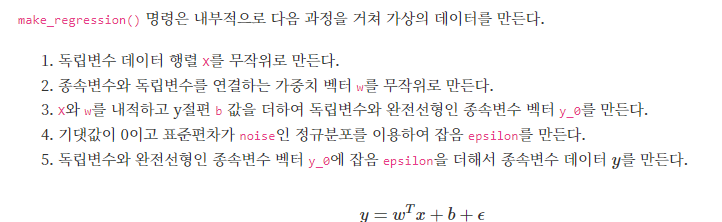

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

X, y, w = make_regression(
    n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

X[:10]
y[:10]
w

In [ ]:
# 시각화
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("regression line")
plt.show()